# Testing the implementation of basic ML model with robustness checks

## Import model code

In [1]:
!ls ..

Dockerfile             models                 run_modern_march.py
LICENSE                nbs                    run_original_march.py
Makefile               run.sh                 run_robust_basic_ml.py
README.md              run_alternative_ml.py  utils
data                   run_basic_ml.py
install.sh             run_extended_ml.py


In [2]:
!ln -s ../models/

ln: ./models: File exists


In [3]:
!ln -s ../utils/

ln: ./utils: File exists


In [4]:
!ln -s ../data/

ln: ./data: File exists


In [5]:
!ls

01_Data_Preparation.ipynb      data
02_Dissimilarity_Metric.ipynb  img
03_Basic_ML_Model.ipynb        models
04_Alternative_ML_Model.ipynb  utils
05_Robust_Basic_ML_Model.ipynb


In [6]:
from models.robust_basic_ml import RobustBasicMLModel

## Create simple model

In [7]:
model = RobustBasicMLModel(
    num_humans=10,
    num_ml=10,
    perc_bad_ml=0.35,
    belief_dims=20,
    p_1=0.1,
    p_2=0.9,
    p_3=0.9,
    p_h1=0.1,
    p_h2=0.5,
    p_ml=0.8,
    p_ml_bad=0.2,
)

In [8]:
def print_model(model):
    print("MODEL CONFIGURATION")
    print(model.conf)
    print("MODEL AGENTS")
    for a in model.schedule.agents:
        print(f"{a.unique_id}, kl={a.kl}, state={a.state}")

In [9]:
print_model(model)

MODEL CONFIGURATION
{'num_humans': 10, 'num_ml': 10, 'perc_bad_ml': 0.35, 'num_bad_ml': 3, 'belief_dims': 20, 'p_1': 0.1, 'p_2': 0.9, 'p_3': 0.9, 'p_h1': 0.1, 'p_h2': 0.5, 'p_ml': 0.8, 'p_ml_bad': 0.2, 'p_human_cf': 0.5, 'p_org_cf': 0.5, 'ml_dims': [17, 6, 0, 2, 11, 18, 13, 14, 5, 19]}
MODEL AGENTS
R1, kl=1.0, state=[ 1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1]
O1, kl=0.0, state=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
H1, kl=0.4, state=[ 1  1  0  1 -1  0  1 -1 -1  1 -1 -1  1 -1 -1 -1  0  0  0 -1]
H2, kl=0.4, state=[ 1  0 -1 -1  0 -1  0  0  1 -1 -1 -1 -1  0  0  0 -1  1 -1  1]
H3, kl=0.2, state=[-1  1  0 -1 -1  0  1  1 -1  0 -1  0  1  0 -1 -1  1 -1  0  0]
H4, kl=0.25, state=[ 0  0  0  1  1  0  1  1  0  0  1  0  1  0 -1  0  1  1 -1  1]
H5, kl=0.2, state=[-1  0 -1  1  1  1 -1  1 -1  0 -1  0  0 -1  0 -1 -1  1  0  0]
H6, kl=0.2, state=[ 1 -1  1  1 -1  0 -1  0 -1 -1  1  1  0  1  0  0  0  0  1  1]
H7, kl=0.3, state=[ 1  0  1 -1 -1  0  1  1  0  1  1  1  0  1  0 -1  0 -1  0  0]

In [10]:
for a in model.schedule.agents[(2+model.conf["num_humans"]):]:
    print(a.p_ml)

0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.2
0.2
0.2


In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("data/robust_ml_agg_20200402-134520.csv")
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
config,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000
belief_dims,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000
num_humans,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000
num_ml,15.0000,15.0000,15.0000,15.0000,15.0000,15.0000,15.0000,15.0000,15.0000,15.0000
num_bad_ml,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000
perc_bad_ml,0.2000,0.2000,0.2000,0.2000,0.2000,0.2000,0.2000,0.2000,0.2000,0.2000
p_1,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.5000
p_2,0.1000,0.1000,0.1000,0.5000,0.5000,0.5000,0.9000,0.9000,0.9000,0.1000
p_3,0.1000,0.5000,0.9000,0.1000,0.5000,0.9000,0.1000,0.5000,0.9000,0.1000
p_h1,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000


In [13]:
import matplotlib.pyplot as plt

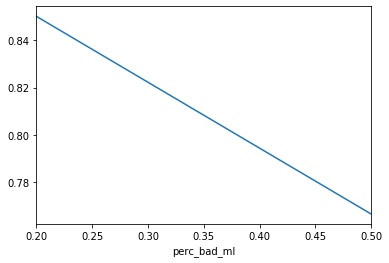

In [17]:
data.groupby('perc_bad_ml').median()['code_kl_last'].plot()

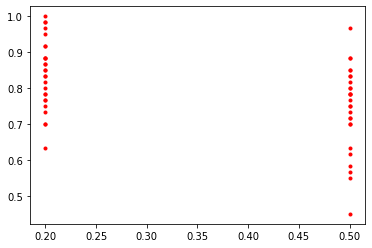

In [18]:
plt.plot(data.perc_bad_ml, data.code_kl_last, 'r.')